# Client to the YOLOv3_deployed_model

In [1]:
import os
import io
import cv2
import requests
import numpy as np
from IPython.display import Image, display

In [2]:
base_url = 'http://localhost:8000'
endpoint = '/predict'
model = 'yolov3-tiny'

In [3]:
url_with_endpoint_no_params = base_url + endpoint
url_with_endpoint_no_params

'http://localhost:8000/predict'

To set any of the expected parameters, the syntax is to add a "?" character followed by the name of the parameter and its value. For extra parameters add '&paramter=VALUE'


In [18]:
full_url = url_with_endpoint_no_params + "?model=" + model + '&confidence=0.2'
full_url

'http://localhost:8000/predict?model=yolov3-tiny&confidence=0.2'

This endpoint expects both a model's name and an image. But since the image is more complex it is not passed within the URL. Instead we leverage the `requests` library to handle this process.

## Sending a request to server


In [5]:
def response_from_server(url, image_file,verbose=True):
    """Makes a POST request to the server and returns the response.

    Args:
        url (str): URL that the request is sent to.
        image_file (_io.BufferedReader): File to upload, should be an image.
        verbose (bool): True if the status of the response should be printed. False otherwise.

    Returns:
        requests.models.Response: Response from the server.
    """

    files = {'file': image_file}
    response = requests.post(url, files=files)
    status_code = response.status_code
    if verbose:
        msg = "Everything went well!" if status_code == 200 else "There was an error when handling the request."
        print(msg)
    return response

In [15]:
with open("Files/images/clock2.jpg", "rb") as image_file:
    prediction = response_from_server(full_url, image_file)

Everything went well!



### Creating the display_image_from_response function

In [7]:
dir_name = "images_predicted"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [8]:
def display_image_from_response(response):
    """Display image within server's response.

    Args:
        response (requests.models.Response): The response from the server after object detection.
    """

    image_stream = io.BytesIO(response.content)
    image_stream.seek(0)
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    filename = "image_with_objects.jpeg"
    cv2.imwrite(f'images_predicted/{filename}', image)
    display(Image(f'images_predicted/{filename}'))

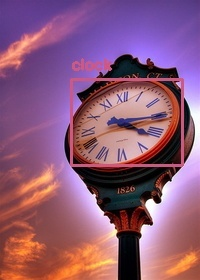

In [16]:
display_image_from_response(prediction)

###Test on multiple images

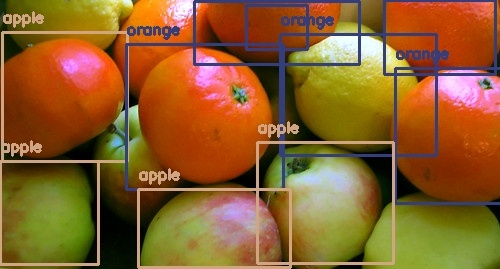

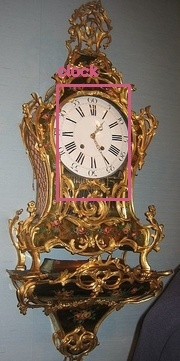

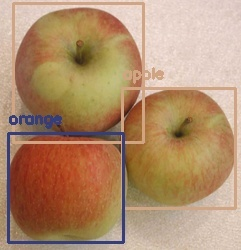

In [19]:
image_files = [
    'fruits.jpg',
    'clock3.jpg',
    'apples.jpg'
]

for image_file in image_files:
    with open(f"Files/images/{image_file}", "rb") as image_file:
        prediction = response_from_server(full_url, image_file, verbose=False)

    display_image_from_response(prediction)